<a href="https://colab.research.google.com/github/aaabduali/Facial-Emotion/blob/main/VGG16_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d 'msambare/fer2013'

 94% 57.0M/60.3M [00:01<00:00, 24.7MB/s]
100% 60.3M/60.3M [00:01<00:00, 37.9MB/s]


In [3]:
import os
import zipfile

local_zip = '/content/fer2013.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir='/tmp/'

train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

surprise_train_dir=os.path.join(train_dir,'surprise')
fear_train_dir=os.path.join(train_dir,'fear')
angry_train_dir=os.path.join(train_dir,'angry')
neutral_train_dir=os.path.join(train_dir,'neutral')
sad_train_dir=os.path.join(train_dir,'sad')
disgust_train_dir=os.path.join(train_dir,'disgust')
happy_train_dir=os.path.join(train_dir,'happy')

surprise_test_dir=os.path.join(test_dir,'surprise')
fear_test_dir=os.path.join(test_dir,'fear')
angry_test_dir=os.path.join(test_dir,'angry')
neutral_test_dir=os.path.join(test_dir,'neutral')
sad_test_dir=os.path.join(test_dir,'sad')
disgust_test_dir=os.path.join(test_dir,'disgust')
happy_test_dir=os.path.join(test_dir,'happy')

In [5]:
train_happy_names = os.listdir(happy_train_dir)
print(train_happy_names[:10])

['Training_60245031.jpg', 'Training_54109445.jpg', 'Training_6928645.jpg', 'Training_2470912.jpg', 'Training_51982121.jpg', 'Training_96046781.jpg', 'Training_98642505.jpg', 'Training_50241429.jpg', 'Training_41892550.jpg', 'Training_51140981.jpg']


In [6]:
print("Total images in the training data with surprise label are: ",len(os.listdir(surprise_train_dir)))
print("Total images in the training data with fear label are: ",len(os.listdir(fear_train_dir)))
print("Total images in the training data with angry label are: ",len(os.listdir(angry_train_dir)))
print("Total images in the training data with neutral label are: ",len(os.listdir(neutral_train_dir)))
print("Total images in the training data with sad label are: ",len(os.listdir(sad_train_dir)))
print("Total images in the training data with disgust label are: ",len(os.listdir(disgust_train_dir)))
print("Total images in the training data with happy label are: ",len(os.listdir(happy_train_dir)))


Total images in the training data with surprise label are:  3171
Total images in the training data with fear label are:  4097
Total images in the training data with angry label are:  3995
Total images in the training data with neutral label are:  4965
Total images in the training data with sad label are:  4830
Total images in the training data with disgust label are:  436
Total images in the training data with happy label are:  7215


In [7]:
print("Total images in the test data with surprise label are: ",len(os.listdir(surprise_test_dir)))
print("Total images in the test data with fear label are: ",len(os.listdir(fear_test_dir)))
print("Total images in the test data with angry label are: ",len(os.listdir(angry_test_dir)))
print("Total images in the test data with neutral label are: ",len(os.listdir(neutral_test_dir)))
print("Total images in the test data with sad label are: ",len(os.listdir(sad_test_dir)))
print("Total images in the test data with disgust label are: ",len(os.listdir(disgust_test_dir)))
print("Total images in the test data with happy label are: ",len(os.listdir(happy_test_dir)))

Total images in the test data with surprise label are:  831
Total images in the test data with fear label are:  1024
Total images in the test data with angry label are:  958
Total images in the test data with neutral label are:  1233
Total images in the test data with sad label are:  1247
Total images in the test data with disgust label are:  111
Total images in the test data with happy label are:  1774


In [8]:
import tensorflow as tf

In [9]:
!pip install keras_vggface

In [10]:
!pip install keras_applications

     |████████████████████████████████| 51kB 2.7MB/s 


In [12]:
from keras_vggface.vggface import VGGFace

In [13]:
vgg_cnn=VGGFace(weights='vggface',include_top=False,input_shape=(224,224,3))

58916864/58909280 [==============================] - 2s 0us/step


In [15]:
for layer in vgg_cnn.layers:
  layer.trainable=False

In [16]:
model=tf.keras.models.Sequential()


model.add(vgg_cnn)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(7,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vggface_vgg16 (Functional)   (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 455       
Total params: 27,593,543
Trainable params: 12,878,855
Non-trainable params: 14,714,688
___________________________________

In [18]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.,rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
  
      fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1/255.,rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      
      fill_mode='nearest')

In [19]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=80,
                                                 class_mode='categorical',
                                                 
                                                 target_size=(224,224))
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 batch_size=20,
                                                
                                                 class_mode='categorical',
                                                 target_size=(224,224))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [24]:
opt = tf.keras.optimizers.RMSprop()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
checkpoint_path="./checkpoints"

chk_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,save_weights_only=True,verbose=1)

In [26]:
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples/train_generator.batch_size ,
                  validation_data=test_generator,
                  validation_steps=test_generator.samples/test_generator.batch_size,
                  epochs=50,
                  callbacks=[chk_callback],
                  verbose=1
                  )

Epoch 1/10
358/358 [==============================] - 500s 1s/step - loss: 1.1107 - accuracy: 0.5867 - val_loss: 1.0492 - val_accuracy: 0.6006

Epoch 00001: val_loss improved from inf to 1.04923, saving model to ./checkpoints
Epoch 2/10
358/358 [==============================] - 492s 1s/step - loss: 1.0857 - accuracy: 0.5945 - val_loss: 1.0510 - val_accuracy: 0.6145

Epoch 00002: val_loss did not improve from 1.04923
Epoch 3/10
358/358 [==============================] - 496s 1s/step - loss: 1.0782 - accuracy: 0.6018 - val_loss: 1.0474 - val_accuracy: 0.6034

Epoch 00003: val_loss improved from 1.04923 to 1.04744, saving model to ./checkpoints
Epoch 4/10
358/358 [==============================] - 492s 1s/step - loss: 1.0622 - accuracy: 0.6057 - val_loss: 1.0412 - val_accuracy: 0.6116

Epoch 00004: val_loss improved from 1.04744 to 1.04119, saving model to ./checkpoints
Epoch 5/10
358/358 [==============================] - 492s 1s/step - loss: 1.0751 - accuracy: 0.6012 - val_loss: 1.0498

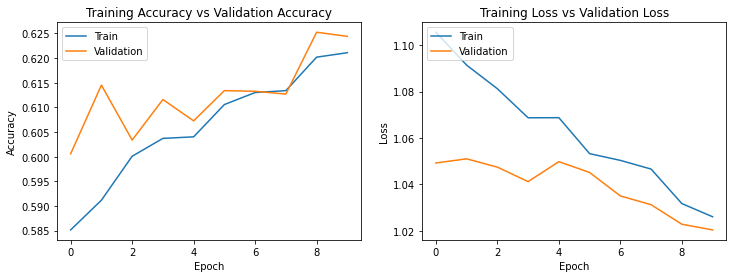

In [27]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()